In [101]:
# Mengimpor library
import numpy as np   #"numpy" Digunakan untuk operasi array dan manipulasi data numerik.
import pandas as pd  #pandas (pd): Digunakan untuk memanipulasi dan menganalisis data tabular.
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [102]:
# Membaca data dari file CSV
df = pd.read_csv('dataset.csv', sep=';')
print("Lima baris pertama dari dataset:")
print(df.head())

Lima baris pertama dari dataset:
      X1    X2     X3     X4    IPG  CatIPG
0  52.38  20.0  64.79  24.04  79.50  Rendah
1  58.41  12.0  59.84  29.10  85.23  Rendah
2  52.30  10.0  57.65  28.87  92.25  Tinggi
3  53.83  10.0  59.40  31.46  93.35  Tinggi
4  52.03  10.0  57.52  29.09  87.03  Rendah


In [88]:
# Memeriksa tipe data setiap kolom setelah transformasi
print("\nTipe data setiap kolom setelah transformasi:")
print(df.dtypes)


Tipe data setiap kolom setelah transformasi:
X1        float64
X2        float64
X3        float64
X4        float64
IPG       float64
CatIPG     object
dtype: object


In [89]:
# Label Encoding kolom 'CatIPG'
label_encoder = LabelEncoder()
df['CatIPG'] = label_encoder.fit_transform(df['CatIPG'])

In [90]:
df['CatIPG']

0      0
1      0
2      1
3      1
4      0
      ..
509    0
510    0
511    0
512    0
513    1
Name: CatIPG, Length: 514, dtype: int32

In [91]:
# Memeriksa tipe data setiap kolom setelah transformasi
print("\nTipe data setiap kolom setelah transformasi:")
print(df.dtypes)


Tipe data setiap kolom setelah transformasi:
X1        float64
X2        float64
X3        float64
X4        float64
IPG       float64
CatIPG      int32
dtype: object


In [92]:
# Memilih kolom yang akan distandarisasi (dalam contoh ini, semua kecuali 'CatIPG')
columns_to_scale = ['X1', 'X2', 'X3', 'X4', 'IPG']

In [93]:
# Memisahkan kolom numerik dan non-numerik
X_numerical = df[columns_to_scale]
X_non_numerical = df.drop(columns=columns_to_scale)

In [94]:
# Standarisasi fitur yang dipilih
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

In [95]:
# Menggabungkan kembali kolom yang sudah distandarisasi dengan kolom non-numerik
X = np.hstack((X_numerical_scaled, X_non_numerical.values))

In [96]:
# Memisahkan target
y = df['CatIPG']

In [97]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Menampilkan dimensi data pelatihan dan pengujian
print(f"Dimensi data pelatihan: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensi data pengujian: X_test: {X_test.shape}, y_test: {y_test.shape}")

Dimensi data pelatihan: X_train: (411, 6), y_train: (411,)
Dimensi data pengujian: X_test: (103, 6), y_test: (103,)


In [105]:
# Membuat model KNN
knn = KNeighborsClassifier()

# Menyiapkan parameter untuk tuning
params = {
    'n_neighbors': [3],  # Mencoba nilai k = 3
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [106]:
# Melakukan optimasi dengan GridSearchCV (Cross-validastion)
grid_search = GridSearchCV(knn, params, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("\nParameter Terbaik:", grid_search.best_params_)


Parameter Terbaik: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


Akurasi: 0.9902912621359223

Classification Report:
              precision    recall  f1-score   support

      Rendah       1.00      0.98      0.99        42
      Tinggi       0.98      1.00      0.99        61

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103

Confusion Matrix:


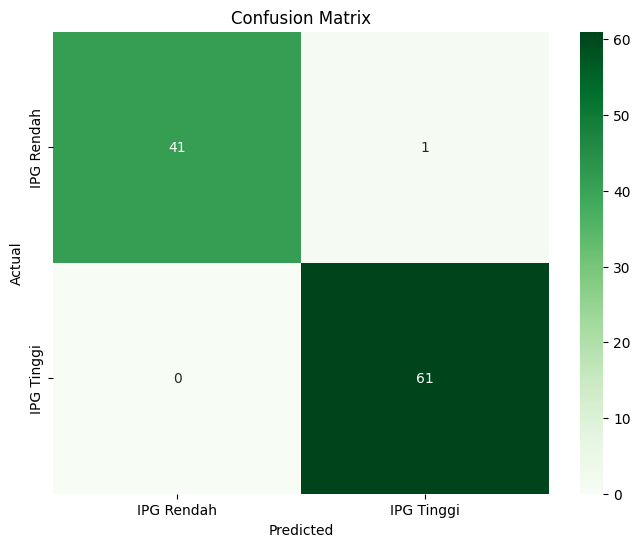

In [107]:
# Memprediksi data pengujian
y_pred = grid_search.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menghitung dan menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Rendah', 'Tinggi']))

# Menghitung dan menampilkan confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['IPG Rendah', 'IPG Tinggi'], 
            yticklabels=['IPG Rendah', 'IPG Tinggi'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()